<a href="https://colab.research.google.com/github/saishdesai23/Movie-review-sentiment-analyzer/blob/main/Movie_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB Movie Review Sentiment Analysis
## Author: Saish Desai

**Installing and Importing required packages**

In [3]:
# connecting google drive to the notebook
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [4]:
import pandas as pd
import numpy as np


# importing packages for text pre-porcessing
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Importing the data**

In [5]:
data = pd.read_csv("/content/gdrive/MyDrive/Kaggle Competitions/IMDB Movie Review sentiment analysis/data/movie.csv")
data

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [6]:
X = data.drop(columns='label')
y = data['label']

**Train Test Split**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state =42)

In [8]:
X_train.head()

,text
38015,"Awful, simply awful. It proves my theory about..."
2281,When I first saw this film it was about 1956 a...
36629,This movie is just lame. A total waste of time...
6087,Unless the title is supposed to be some kind o...
11792,Red Skelton was still another major star who m...


In [9]:
X_test.head()

,text
32823,The central theme in this movie seems to be co...
16298,"An excellent example of ""cowboy noir"", as it's..."
28505,The ending made my heart jump up into my throa...
6689,Only the chosen ones will appreciate the quali...
26893,"This is a really funny film, especially the se..."


**Stop Word Removal**

In [10]:
stopword_list = stopwords.words("english")
clean_text = []
for ele in X_train['text']:
  ele = ele.split()
  ele = [e for e in ele if e not in stopword_list]
  ele = " ".join(ele)
  clean_text.append(ele)

In [11]:
clean_text_test = []
for ele in X_test['text']:
  ele = ele.split()
  ele = [e for e in ele if e not in stopword_list]
  ele = " ".join(ele)
  clean_text_test.append(ele)

In [12]:
X_train['clean_text'] = clean_text
X_test['clean_text'] = clean_text_test

In [13]:
X_train.head()

,text,clean_text
38015,"Awful, simply awful. It proves my theory about...","Awful, simply awful. It proves theory ""star po..."
2281,When I first saw this film it was about 1956 a...,When I first saw film 1956 even though I saw r...
36629,This movie is just lame. A total waste of time...,This movie lame. A total waste time money. The...
6087,Unless the title is supposed to be some kind o...,Unless title supposed kind spoiler wife's tran...
11792,Red Skelton was still another major star who m...,Red Skelton still another major star made tran...


In [14]:
X_test.head()

,text,clean_text
32823,The central theme in this movie seems to be co...,"The central theme movie seems confusion, relat..."
16298,"An excellent example of ""cowboy noir"", as it's...","An excellent example ""cowboy noir"", called, un..."
28505,The ending made my heart jump up into my throa...,The ending made heart jump throat. I proceeded...
6689,Only the chosen ones will appreciate the quali...,Only chosen ones appreciate quality story char...
26893,"This is a really funny film, especially the se...","This really funny film, especially second, thi..."


**Tokenization**

In [15]:
# Initialization of tokenizer and Hyper paramter tuning
vocab_size = 10000
oov_tok = "<OOV>" #OOV = Out Of Vocabulary
max_length = 120
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# tokenization and padding of train data
tokenizer.fit_on_texts(X_train['clean_text'])
training_sequences = tokenizer.texts_to_sequences(X_train['clean_text'])
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding="post")

# tokenization and padding of test data
tokenizer.fit_on_texts(X_test['clean_text'])
testing_sequences = tokenizer.texts_to_sequences(X_test['clean_text'])
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding="post")

In [16]:
training_padded

array([[ 304,  265,  304, ...,    0,    0,    0],
       [ 174,    3,   26, ...,    0,    0,    0],
       [  10,    5,  836, ...,    0,    0,    0],
       ...,
       [  38, 4506,   79, ..., 5856, 5856,    1],
       [6087,    1,    1, ...,  651,  474, 1252],
       [  10,    5,  430, ...,    0,    0,    0]], dtype=int32)

In [17]:
training_padded

array([[ 304,  265,  304, ...,    0,    0,    0],
       [ 174,    3,   26, ...,    0,    0,    0],
       [  10,    5,  836, ...,    0,    0,    0],
       ...,
       [  38, 4506,   79, ..., 5856, 5856,    1],
       [6087,    1,    1, ...,  651,  474, 1252],
       [  10,    5,  430, ...,    0,    0,    0]], dtype=int32)

In [18]:
#First we're converting the data to numpy arrays
training_padded = np.array(training_padded)
training_labels = np.array(y_train).astype(float)
testing_padded = np.array(testing_padded)
testing_labels = np.array(y_test).astype(float)

**Model Creation**

In [19]:
embedding_dim = 20
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),metrics=['accuracy'], )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 20)           200000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               10368     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 211,953
Trainable params: 211,953
Non-trainable params: 0
_________________________________________________________________


In [20]:
CallBack = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.005,
    patience=2,
    mode="auto",
    restore_best_weights=False
)

**Model Training**

In [21]:
#Now, let's train the model
num_epochs = 20
history = model.fit(training_padded, training_labels.astype(float),\
                    epochs=num_epochs, validation_data=(testing_padded, testing_labels.astype(float)),
                   verbose=1, callbacks= [CallBack])

Epoch 1/20
875/875 [==============================] - 19s 13ms/step - loss: 0.6920 - accuracy: 0.5299 - val_loss: 0.6921 - val_accuracy: 0.5319
Epoch 2/20
875/875 [==============================] - 11s 12ms/step - loss: 0.4375 - accuracy: 0.8001 - val_loss: 0.8091 - val_accuracy: 0.6046
Epoch 3/20
875/875 [==============================] - 11s 13ms/step - loss: 0.2479 - accuracy: 0.9047 - val_loss: 0.9212 - val_accuracy: 0.5889
Epoch 4/20
875/875 [==============================] - 10s 12ms/step - loss: 0.2034 - accuracy: 0.9247 - val_loss: 1.0055 - val_accuracy: 0.5825


**Model Validation**

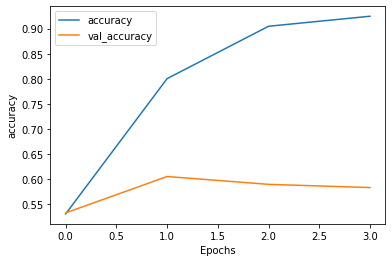

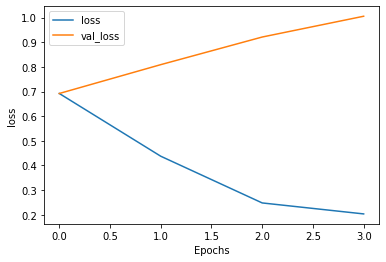

In [23]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')